In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil
import pandas as pd
# import sys
# sys.path.append('./../../entropy/sweetsourcod/')
# from sweetsourcod.lempel_ziv import cross_parsing_complexity, cross_parsing_factors

In [33]:
def dist2D(pos1, pos2):
    return np.sqrt((pos1[0]-pos2[0])**2+(pos1[1]-pos2[1])**2)

In [3]:
filename = '20221104_0051.npy'
traj = np.load(f'{filename}', allow_pickle=True).item()
lenFrames = traj['trajectories'].shape[0]
Nfish = traj['trajectories'].shape[1]

# traj of the center of mass:
trajCM = np.sum(traj['trajectories'], axis=1)/Nfish

traj['setup_points']
print(-traj['setup_points']['corners_out'][0,0]+traj['setup_points']['corners_out'][1,0])
print(-traj['setup_points']['corners_out'][3,0]+traj['setup_points']['corners_out'][2,0])

2755
2876


In [34]:
min_dists = []
max_dists = []
max_dists_to_CM = []
# max_time = 100000
max_time = lenFrames
for t in range(max_time):
    dists = []
    dists_to_CM = []
    for f in range(Nfish-1):
        dists_to_CM.append(dist2D(traj['trajectories'][t,f,:], trajCM[t,:]))
        for g in range(f+1,Nfish):
            d = dist2D(traj['trajectories'][t,f,:], traj['trajectories'][t,g,:])
            dists.append(d)
    min_dists.append(min(dists))
    max_dists.append(max(dists))
    dists_to_CM.append(dist2D(traj['trajectories'][t,Nfish-1,:], trajCM[t,:]))
    max_dists_to_CM.append(max(dists_to_CM))

In [35]:
minDist, maxDist, maxDistCM = min(min_dists), max(max_dists), max(max_dists_to_CM)
avgDistCM = np.average(max_dists_to_CM)
print(f'Min distance between fish: {minDist}')
print(f'Max distance between fish: {maxDist}')
print(f'Max distance to the center of mass: {maxDistCM}')
print(f'Average distance to the center of mass: {avgDistCM}')

Min distance between fish: 0.3319327425231726
Max distance between fish: 1807.0182116972996
Max distance to the center of mass: 1220.0783491539992
Average distance to the center of mass: 379.3947211695722


(array([4.1000e+01, 5.9000e+01, 1.1600e+02, 1.7100e+02, 2.5400e+02,
        4.4400e+02, 7.3400e+02, 9.2900e+02, 1.2910e+03, 1.8480e+03,
        2.5160e+03, 3.4850e+03, 4.4490e+03, 5.6850e+03, 7.1960e+03,
        8.1700e+03, 9.7580e+03, 1.0934e+04, 1.1922e+04, 1.2239e+04,
        1.1860e+04, 1.1732e+04, 1.1279e+04, 1.0849e+04, 1.0011e+04,
        8.7500e+03, 7.5840e+03, 6.1770e+03, 4.7880e+03, 3.6570e+03,
        2.9750e+03, 2.3900e+03, 1.7290e+03, 1.1310e+03, 8.5100e+02,
        6.1500e+02, 3.8200e+02, 3.1800e+02, 2.2400e+02, 1.6800e+02,
        1.0100e+02, 6.6000e+01, 4.0000e+01, 3.5000e+01, 2.1000e+01,
        1.3000e+01, 5.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([  0.33193274,   4.78088431,   9.22983587,  13.67878743,
         18.127739  ,  22.57669056,  27.02564212,  31.47459368,
         35.92354525,  40.37249681,  44.82144837,  49.27039994,
         53.7193515 ,  58.16830306,  62.61725463,  67.06620619,
         71.51515775,  75.96410932,  80.41306088,  84.86201244

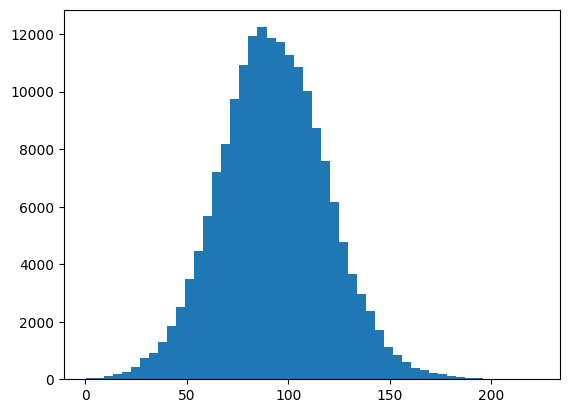

In [7]:
fig, ax = plt.subplots()
ax.hist(min_dists, bins=50)
# ax.set_xlim(0,20.0)

In [19]:
# Minimum distance analysis
min_dists = np.array(min_dists)
min_dists_ab_10 = min_dists[min_dists > 10.0]
min_dists_ab_15 = min_dists[min_dists > 15.0]
min_dists_ab_20 = min_dists[min_dists > 20.0]
min_dists_ab_30 = min_dists[min_dists > 30.0]
min_dists_ab_50 = min_dists[min_dists > 50.0]

In [20]:
print(len(min_dists_ab_10)/len(min_dists))
print(len(min_dists_ab_15)/len(min_dists))
print(len(min_dists_ab_20)/len(min_dists))
print(len(min_dists_ab_30)/len(min_dists))
print(len(min_dists_ab_50)/len(min_dists))

0.9993444480863996
0.9986000077777346
0.9973611257715235
0.9914500474997361
0.9505280526219299


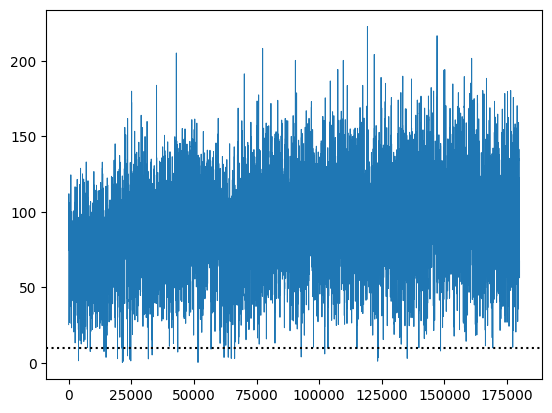

In [30]:
# Minimum distance in time:
fig,ax = plt.subplots()
ax.plot(range(max_time), min_dists, lw=0.7)
ax.axhline(10.0, ls=':', color='k')

(array([1.1100e+02, 8.8200e+02, 2.9300e+03, 5.9900e+03, 9.9300e+03,
        1.3062e+04, 1.6269e+04, 1.6862e+04, 1.7263e+04, 1.5898e+04,
        1.3969e+04, 1.1250e+04, 1.0348e+04, 8.2780e+03, 6.3920e+03,
        5.3680e+03, 4.2630e+03, 3.5760e+03, 2.7480e+03, 2.1820e+03,
        1.7750e+03, 1.5740e+03, 1.2140e+03, 1.1390e+03, 1.0090e+03,
        8.2700e+02, 7.6700e+02, 5.8900e+02, 6.5200e+02, 4.3800e+02,
        3.6300e+02, 3.4600e+02, 3.0400e+02, 2.5700e+02, 2.8500e+02,
        1.4000e+02, 1.0400e+02, 9.6000e+01, 9.0000e+01, 8.8000e+01,
        8.1000e+01, 6.0000e+01, 5.3000e+01, 4.1000e+01, 2.8000e+01,
        3.1000e+01, 2.7000e+01, 1.9000e+01, 1.9000e+01, 1.4000e+01]),
 array([ 133.97146962,  155.69360721,  177.4157448 ,  199.13788239,
         220.86001998,  242.58215757,  264.30429516,  286.02643275,
         307.74857034,  329.47070793,  351.19284552,  372.91498311,
         394.6371207 ,  416.3592583 ,  438.08139589,  459.80353348,
         481.52567107,  503.24780866,  524.969

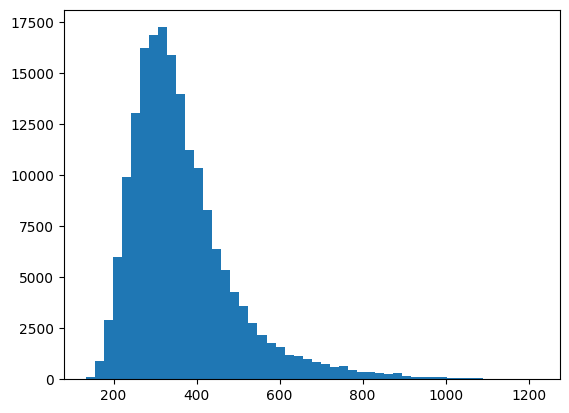

In [8]:
fig, ax = plt.subplots()
ax.hist(max_dists_to_CM, bins=50)
# ax.set_xlim(0,20.0)

In [31]:
# boxSide = round(minDist, 2)
boxSide = 10
print(boxSide)
# L = ceil(maxDistCM*2/boxSide)
Lint = ceil(avgDistCM*2/boxSide)
print(f'Lint: {Lint}')
L = Lint*boxSide
print(L)
print(avgDistCM*2)

Nboxs = Lint**2
print(Nboxs)

10
Lint: 74
740
731.2328087968112
5476


In [11]:
# traj_for_entropy = []
frame_l, col_l, row_l, id_l = [], [], [], []
for t in range(max_time):
    timeStep_allf = []
    colrow_at_t = []
    for f in traj['trajectories'][t]:
        col = int((f[0]-trajCM[0,0]+L/2)/boxSide)
        row = int((f[1]-trajCM[0,1]+L/2)/boxSide)
        if (col, row) in colrow_at_t:
            break
        else:
            colrow_at_t.append((col,row))
        x0, y0 = col*boxSide, row*boxSide
        lilBox = (f[0]-trajCM[0,0]+L/2 > x0 + boxSide/2, f[1]-trajCM[0,1]+L/2 > y0 + boxSide/2)
        if lilBox == (False, True):
            id = 1
        elif lilBox == (True, True):
            id = 2
        elif lilBox == (True, False):
            id = 3
        elif lilBox == (False, False):
            id = 4
        # print(col, row, id)
        timeStep_allf.append([col, row, id])
        frame_l.append(t), col_l.append(col), row_l.append(row), id_l.append(id)
    # traj_for_entropy.append(timeStep_allf)
# traj_for_entropy = np.array(traj_for_entropy)
df_for_entropy = pd.DataFrame({'time': frame_l, 'col':col_l, 'row':row_l, 'id':id_l})


In [12]:
cols = pd.unique(df_for_entropy['col'])
rows = pd.unique(df_for_entropy['row'])

print(len(cols))
# for col in cols:
#     for row in rows:
#         counts = len(df_for_entropy.query('col == @col & row == @row'))
#         if counts > 1:
#             print(col, row, counts)

7651


In [14]:
Lint

2203

In [15]:
# look for a box with many counts close to the center of mass
max_counts = 0
col_closeCM, row_closeCM = -1, -1
min_bound, max_bound = int(Lint/2)-50, int(Lint/2)+50
for c in range(min_bound,max_bound+1):
    for r in range(min_bound,max_bound+1):
        counts = len(df_for_entropy.query('col == @c & row == @r'))
        if counts > max_counts:
            max_counts = counts
            col_closeCM, row_closeCM = c, r
print(col_closeCM, row_closeCM, max_counts)

1102 1091 3


In [18]:
# look for a box with many counts futher away from the CM:
max_counts = 0
col_farCM, row_farCM = -1, -1
min_bound, max_bound = int(Lint/2)-550, int(Lint/2)-450
for c in range(min_bound,max_bound+1):
    for r in range(min_bound,max_bound+1):
        counts = len(df_for_entropy.query('col == @c & row == @r'))
        if counts > max_counts:
            max_counts = counts
            col_farCM, row_farCM = c, r
print(col_farCM, row_farCM, max_counts)

596 606 3


In [24]:
# generate chains
chain_closeCM = np.zeros(max_time)
df = df_for_entropy.query('col == @col_closeCM & row == @row_closeCM')
print(list(df.time), list(df.id))
np.put(chain_closeCM, list(df.time), list(df.id))

chain_farCM = np.zeros(max_time)
df = df_for_entropy.query('col == @col_farCM & row == @row_farCM')
print(list(df.time), list(df.id))
np.put(chain_farCM, list(df.time), list(df.id))

[144182, 144184, 161024] [4, 1, 4]
[174487, 174489, 174490] [3, 2, 2]
